In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("../../data/toydata/titanic.csv")
print(f"{df.shape}")
df.head(1)

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [44]:
def s_rate(df, col):

    return (
        df
        .groupby(col, dropna=False)
        .agg(
            count=("survived", "count"),
            survived_mean=("survived", "mean")
        )
        .sort_values("survived_mean", ascending=False)
    )

In [45]:
df.value_counts("survived")

survived
0    549
1    342
Name: count, dtype: int64

In [46]:
s_rate(df, "embark_town")

,count,survived_mean
embark_town,,
NaN,2,1.000000
Cherbourg,168,0.553571
Queenstown,77,0.389610
Southampton,644,0.336957


In [47]:
s_rate(df, "who")

,count,survived_mean
who,,
woman,271,0.756458
child,83,0.590361
man,537,0.163873


In [48]:
s_rate(df, "class")

,count,survived_mean
class,,
First,216,0.629630
Second,184,0.472826
Third,491,0.242363


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [18]:
cols = ["embark_town", "who", "class"]
target = "survived"

In [19]:
df2 = pd.get_dummies(df[cols], drop_first=True)
X = df2
y = df[target]


In [34]:
print(f"{X.shape}")
X.head(1)

(891, 6)


,embark_town_Queenstown,embark_town_Southampton,who_man,who_woman,class_Second,class_Third
0,False,True,True,False,False,True


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
X_train.shape

(712, 6)

In [52]:
y_train.value_counts()

survived
0    444
1    268
Name: count, dtype: int64

In [29]:
# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


In [37]:
from sklearn.tree import export_text

tree_details = export_text(clf, feature_names=X.columns.tolist())
print(tree_details)

|--- who_man <= 0.50
|   |--- class_Third <= 0.50
|   |   |--- embark_town_Southampton <= 0.50
|   |   |   |--- class: 1
|   |   |--- embark_town_Southampton >  0.50
|   |   |   |--- class: 1
|   |--- class_Third >  0.50
|   |   |--- embark_town_Southampton <= 0.50
|   |   |   |--- class: 1
|   |   |--- embark_town_Southampton >  0.50
|   |   |   |--- class: 0
|--- who_man >  0.50
|   |--- class_Third <= 0.50
|   |   |--- class_Second <= 0.50
|   |   |   |--- class: 0
|   |   |--- class_Second >  0.50
|   |   |   |--- class: 0
|   |--- class_Third >  0.50
|   |   |--- embark_town_Southampton <= 0.50
|   |   |   |--- class: 0
|   |   |--- embark_town_Southampton >  0.50
|   |   |   |--- class: 0



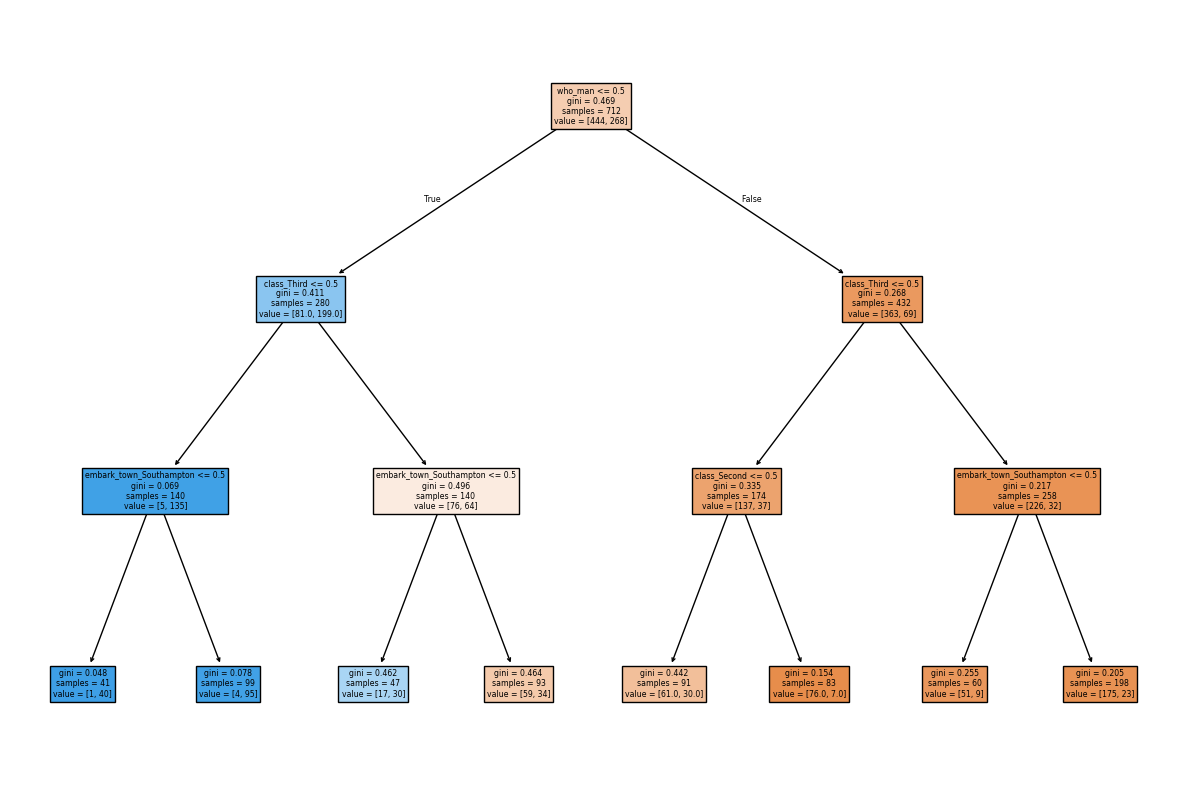

In [36]:
from sklearn import tree

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns.tolist())
plt.show()